In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [4]:
data = pd.read_csv("/content/diabetes.csv")

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Get dataset information
data.info()

# Get descriptive statistics
data.describe()

# Check for unique values in the Outcome column
data['Outcome'].value_counts()

# Check for zeros in critical columns (to identify "nan" values)
(data == 0).sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


**Replace Zeros with NaN**

In [7]:
import numpy as np

# Columns where 0 represents missing values
columns_with_nan = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN
data[columns_with_nan] = data[columns_with_nan].replace(0, np.nan)

# Confirm changes
data.isnull().sum()


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**Analyze Missing Data**

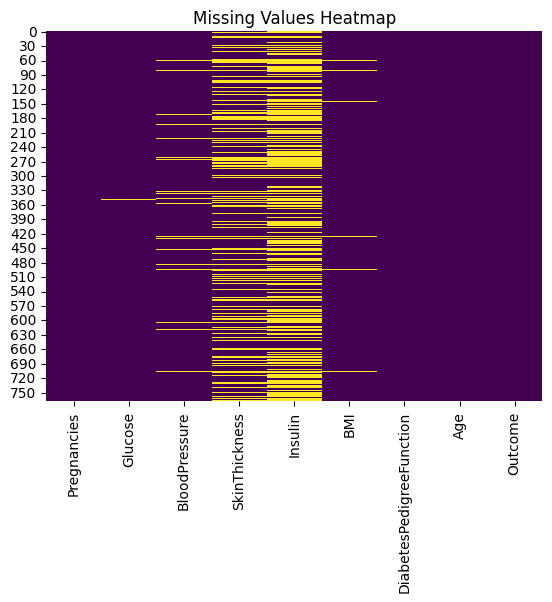

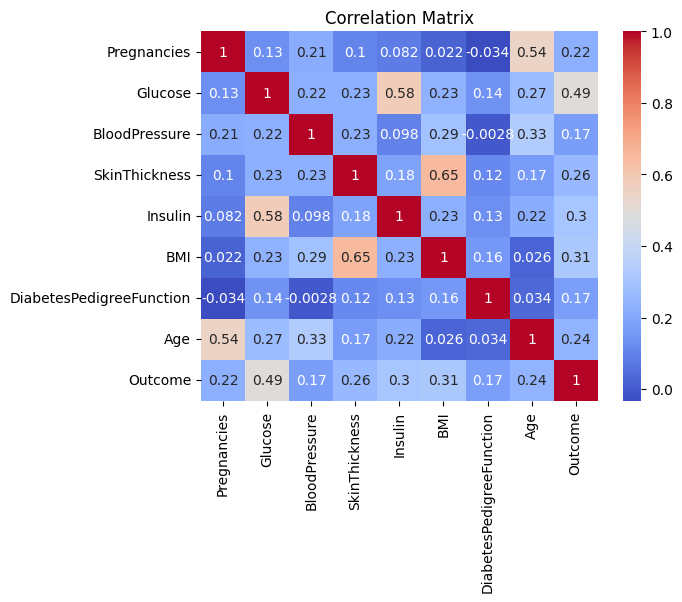

In [8]:
#Check patterns in missing data and decide on imputation methods.
# Visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Check correlations to decide imputation methods
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**Impute Missing Values**

In [9]:
from sklearn.impute import SimpleImputer

# Impute missing values using median (or mean based on analysis)
imputer = SimpleImputer(strategy='median')
data[columns_with_nan] = imputer.fit_transform(data[columns_with_nan])

# Confirm no missing values remain
data.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**Scale the Data**

In [10]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['Outcome']))

# Convert back to DataFrame for readability
scaled_data = pd.DataFrame(scaled_data, columns=data.columns[:-1])

# Add the Outcome column back
scaled_data['Outcome'] = data['Outcome']

scaled_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1


**Split the Data**

In [11]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X = scaled_data.drop(columns=['Outcome'])
y = scaled_data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((614, 8), (154, 8), (614,), (154,))

**Train a Classification Model**

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


              precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

Accuracy: 0.74


**Additional Analysis**

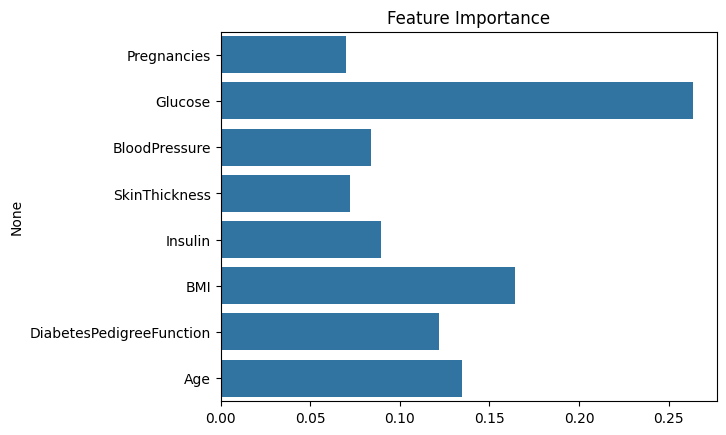

In [13]:
# Feature importance analysis
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()


**Train and Evaluate Logistic Regression**

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy: {logreg_accuracy:.2f}")


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

Accuracy: 0.75


**Train and Evaluate K-Nearest Neighbors (KNN)**

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN with default parameters
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate KNN
print("K-Nearest Neighbors Performance:")
print(classification_report(y_test, y_pred_knn))
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {knn_accuracy:.2f}")


K-Nearest Neighbors Performance:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.61      0.69      0.65        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154

Accuracy: 0.73


**Compare the Two Models**

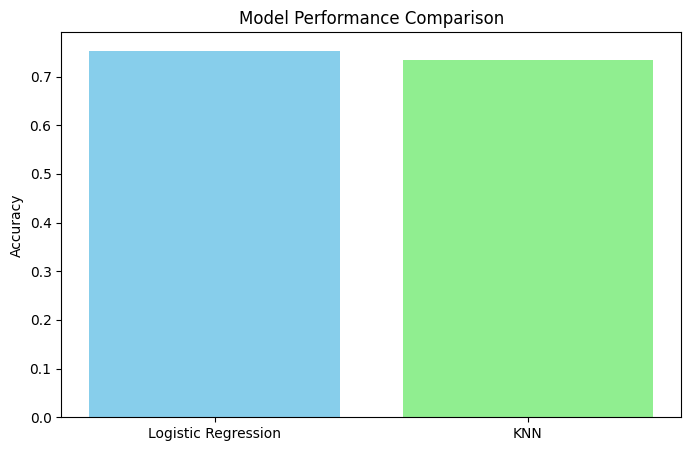

In [16]:
import matplotlib.pyplot as plt

# Comparison of accuracy
models = ['Logistic Regression', 'KNN']
accuracies = [logreg_accuracy, knn_accuracy]

# Bar plot for comparison
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.show()
